In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import numpy as np
import requests
import time
from scipy.stats import linregress
import os
from scipy import stats

shopping_df = Path("shopping_trends_updated.csv")
shopping_df = pd.read_csv(shopping_df)
shopping_df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [2]:
#Add age groups to the DataFrame
shopping_df["Age Groups"] = pd.cut(
    x=shopping_df["Age"],
    bins =[1, 26, 42, 59, np.inf],
    labels=["Gen Z", "Millenials", "Gen X", "Baby Boomer"], 
)

shopping_df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Age Groups
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,Gen X
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,Gen Z
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,Gen X
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,Gen Z
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,Gen X
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly,Millenials
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly,Gen X
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly,Gen X
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly,Gen X


In [3]:
# Reorganize the columns within the DataFrame
organized_df = shopping_df[["Customer ID", "Age", "Age Groups", "Gender", 
                            "Item Purchased", "Category", "Purchase Amount (USD)", 
                            "Location", "Size", "Color", "Season", "Review Rating", 
                            "Subscription Status", "Shipping Type", "Discount Applied", 
                            "Promo Code Used", "Previous Purchases", "Payment Method", 
                            "Frequency of Purchases"]]
organized_df.head()

,Customer ID,Age,Age Groups,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Gen X,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Gen Z,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Gen X,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Gen Z,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Gen X,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [ ]:
### Which age demographic spends the most money?

In [4]:
average_spent_by_age_group = organized_df.groupby('Age Groups')['Purchase Amount (USD)'].mean().reset_index()
average_spent_by_age_group

,Age Groups,Purchase Amount (USD)
0,Gen Z,60.690625
1,Millenials,59.390833
2,Gen X,59.808176
3,Baby Boomer,59.510152


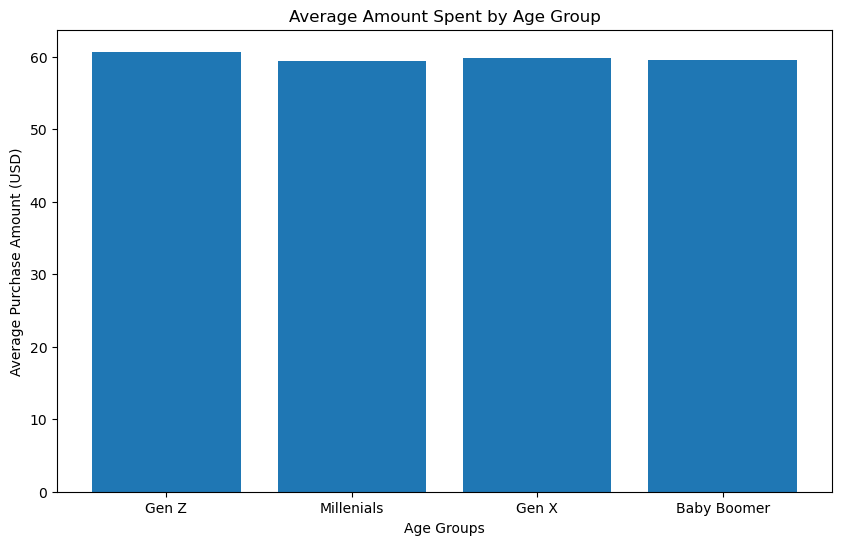

In [5]:
plt.figure(figsize=(10, 6))
plt.bar(average_spent_by_age_group['Age Groups'], average_spent_by_age_group["Purchase Amount (USD)"])
plt.xlabel('Age Groups')
plt.ylabel('Average Purchase Amount (USD)')
plt.title('Average Amount Spent by Age Group')
plt.show()

In [7]:
organized_df["Age Groups"].value_counts()

Age Groups
Gen X          1272
Millenials     1200
Baby Boomer     788
Gen Z           640
Name: count, dtype: int64

In [ ]:
### How frequently do specific age demographics shop? (bi-weekly, bi-monthly, ect)

In [8]:
shopping_frequency = organized_df.pivot_table(index='Frequency of Purchases', columns='Age Groups', aggfunc='size', fill_value=0)
shopping_frequency

Age Groups,Gen Z,Millenials,Gen X,Baby Boomer
Frequency of Purchases,,,,
Annually,102,169,170,131
Bi-Weekly,99,165,184,99
Every 3 Months,100,186,185,113
Fortnightly,94,164,180,104
Monthly,80,179,189,105
Quarterly,89,161,185,128
Weekly,76,176,179,108


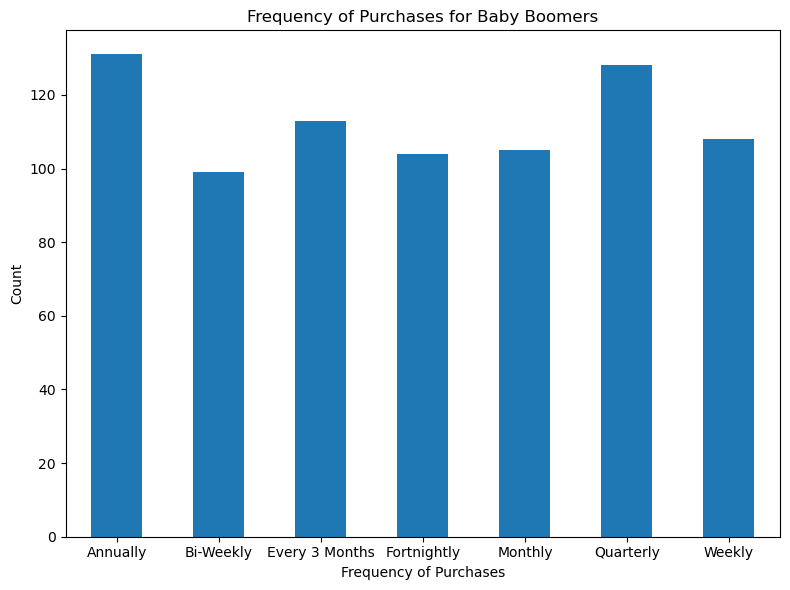

In [9]:
baby_boomer_data = shopping_frequency.loc[:, 'Baby Boomer']
plt.figure(figsize=(8, 6))
baby_boomer_data.plot(kind='bar')
plt.xlabel('Frequency of Purchases')
plt.ylabel('Count')
plt.title('Frequency of Purchases for Baby Boomers')
plt.xticks(rotation=0)  # Rotate x-axis labels if necessary
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

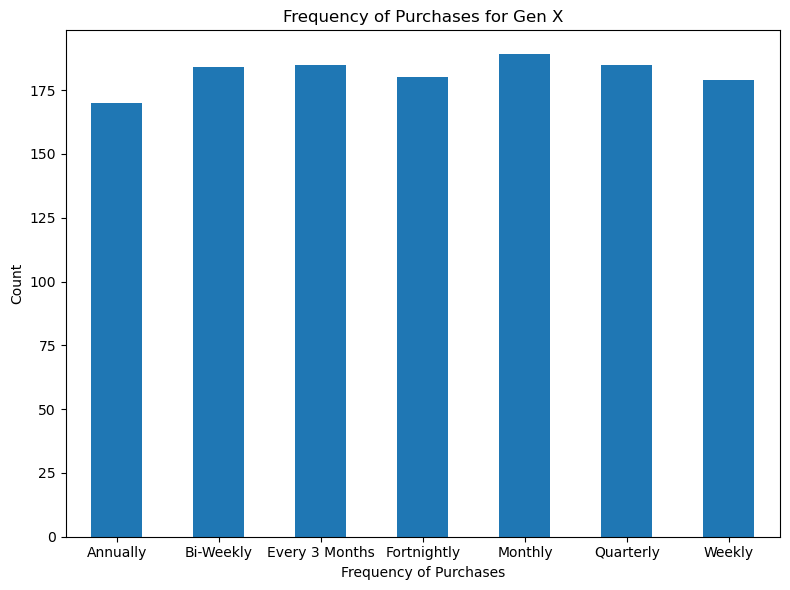

In [10]:
gen_x_data = shopping_frequency.loc[:, 'Gen X']
plt.figure(figsize=(8, 6))
gen_x_data.plot(kind='bar')
plt.xlabel('Frequency of Purchases')
plt.ylabel('Count')
plt.title('Frequency of Purchases for Gen X')
plt.xticks(rotation=0)  # Rotate x-axis labels if necessary
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

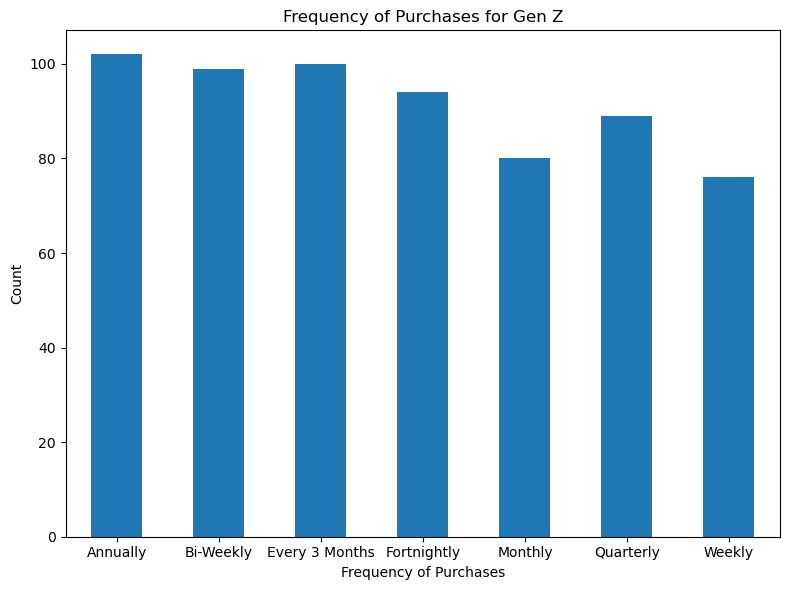

In [11]:
gen_z_data = shopping_frequency.loc[:, 'Gen Z']
plt.figure(figsize=(8, 6))
gen_z_data.plot(kind='bar')
plt.xlabel('Frequency of Purchases')
plt.ylabel('Count')
plt.title('Frequency of Purchases for Gen Z')
plt.xticks(rotation=0)  # Rotate x-axis labels if necessary
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

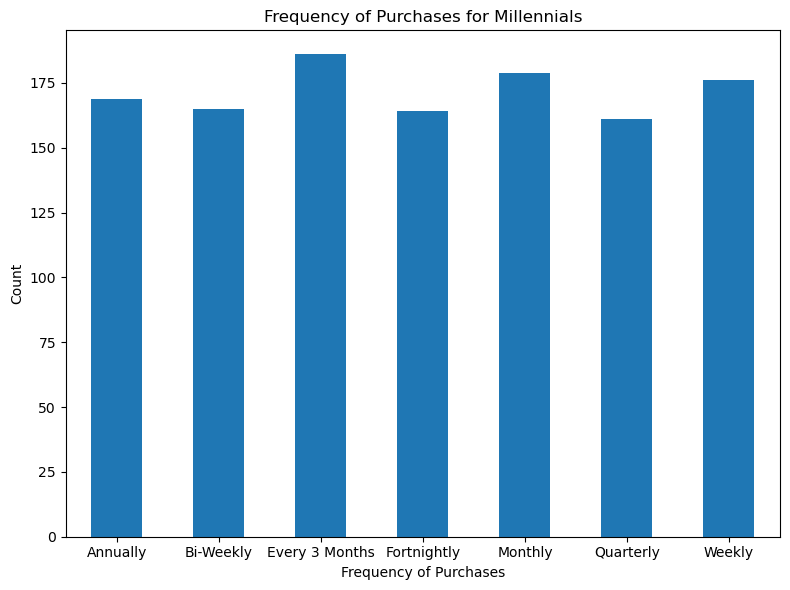

In [14]:
millennial_data = shopping_frequency.loc[:, 'Millenials']
plt.figure(figsize=(8, 6))
millennial_data.plot(kind='bar')
plt.xlabel('Frequency of Purchases')
plt.ylabel('Count')
plt.title('Frequency of Purchases for Millennials')
plt.xticks(rotation=0)  # Rotate x-axis labels if necessary
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [15]:
frequency_counts = organized_df['Frequency of Purchases'].value_counts().reset_index()
frequency_counts.columns = ['Frequency of Purchases', 'Count']
print(frequency_counts)

  Frequency of Purchases  Count
0         Every 3 Months    584
1               Annually    572
2              Quarterly    563
3                Monthly    553
4              Bi-Weekly    547
5            Fortnightly    542
6                 Weekly    539


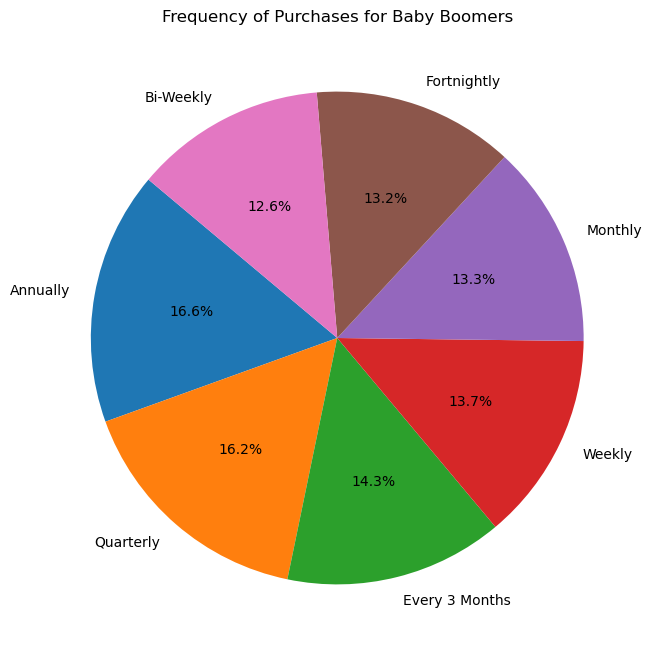

In [16]:
baby_boomers_df = organized_df[shopping_df['Age Groups'] == 'Baby Boomer']
baby_boomers_frequency_counts = baby_boomers_df['Frequency of Purchases'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(baby_boomers_frequency_counts, labels=baby_boomers_frequency_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Frequency of Purchases for Baby Boomers')
plt.show()

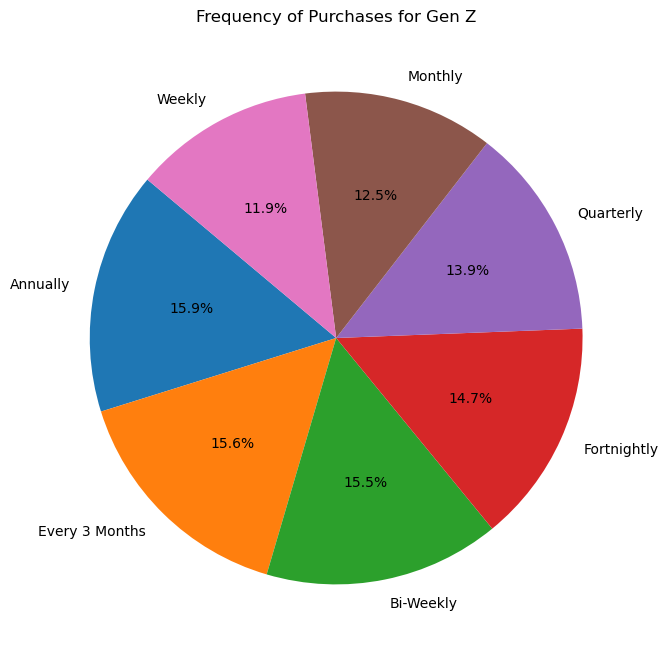

In [17]:
gen_z_df = organized_df[organized_df['Age Groups'] == 'Gen Z']
gen_z_frequency_counts = gen_z_df['Frequency of Purchases'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(gen_z_frequency_counts, labels=gen_z_frequency_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Frequency of Purchases for Gen Z')
plt.show()

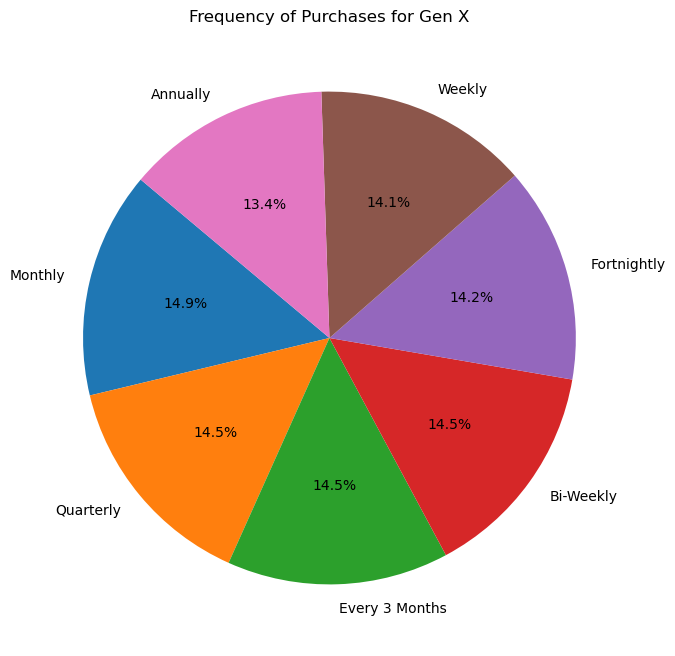

In [18]:
gen_x_df = organized_df[organized_df['Age Groups'] == 'Gen X']
gen_x_frequency_counts = gen_x_df['Frequency of Purchases'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(gen_x_frequency_counts, labels=gen_x_frequency_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Frequency of Purchases for Gen X')
plt.show()

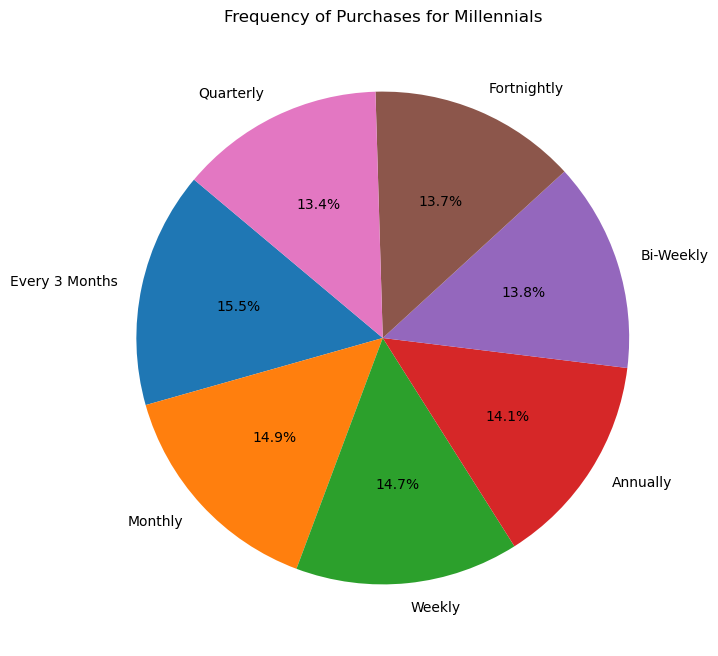

In [19]:
millennial_df = organized_df[organized_df['Age Groups'] == 'Millenials']
millennial_frequency_counts = millennial_df['Frequency of Purchases'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(millennial_frequency_counts, labels=millennial_frequency_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Frequency of Purchases for Millennials')
plt.show()

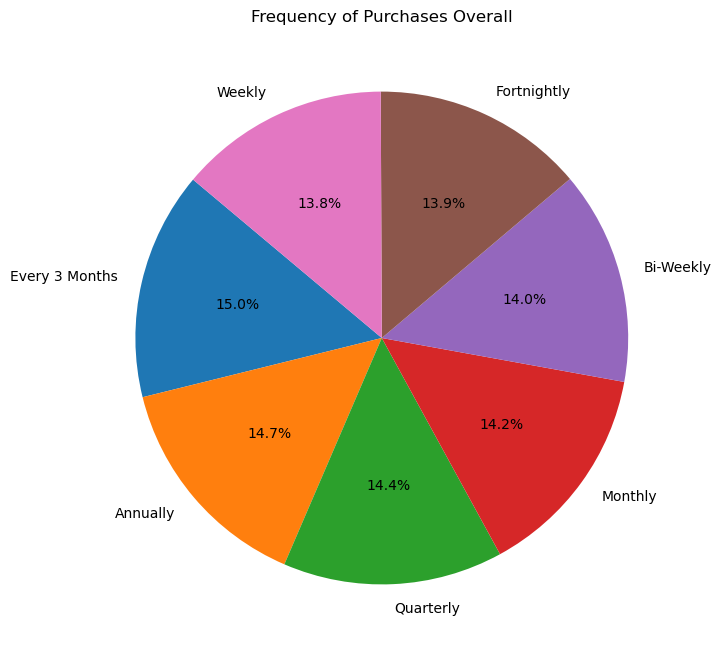

In [20]:
overall_frequency_counts = organized_df['Frequency of Purchases'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(overall_frequency_counts, labels=overall_frequency_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Frequency of Purchases Overall')
plt.show()